# Notebook 1

In [27]:
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
NT_MAP = {c: i for i, c in enumerate(['A', 'C', 'G', 'T'])}

In [29]:
DATDIR = "../data/rpgroup_data"

GENE = 'ykgE'

# Load data corresponding to gene of interest
filelist = []
data_by_condition = {}
conditions = []
df_list = []
for fname in os.listdir(DATDIR, ):
    fpath = f"{DATDIR}/{fname}"
    if os.path.isfile(fpath) and GENE in fname:
        filelist.append(fname)
        cond = fname.removeprefix(GENE).removesuffix("dataset_alldone_with_large")
        conditions.append(cond)
        df = pd.read_csv(
            fpath, sep='\\s+'
        )
        df = df.rename(columns={'seq': 'seq180'})
        df['barcode'] = df['seq180'].str.slice(160,)
        df['promoter'] = df['seq180'].str.slice(0, 160)
        df['condition'] = cond
        data_by_condition[cond] = df
        print("Loaded {} rows and {} columns for gene {} in condition {}".format(
            len(df), len(df.columns) , GENE, cond
        ))
        df_list.append(df)

DF_ALL_CONDITIONS = pd.concat(df_list)
DF_ALL_CONDITIONS

Loaded 18 rows and 7 columns for gene ykgE in condition asnC
Loaded 5533 rows and 7 columns for gene ykgE in condition xanth2
Loaded 585 rows and 7 columns for gene ykgE in condition deoR
Loaded 14 rows and 7 columns for gene ykgE in condition glpR
Loaded 4836 rows and 7 columns for gene ykgE in condition Anaero
Loaded 913 rows and 7 columns for gene ykgE in condition arcA
Loaded 3728 rows and 7 columns for gene ykgE in condition M9
Loaded 3971 rows and 7 columns for gene ykgE in condition 0cAMP
Loaded 4848 rows and 7 columns for gene ykgE in condition Fe
Loaded 5538 rows and 7 columns for gene ykgE in condition xylara
Loaded 14 rows and 7 columns for gene ykgE in condition nhaR
Loaded 5722 rows and 7 columns for gene ykgE in condition LB
Loaded 753 rows and 7 columns for gene ykgE in condition 500cAMP
Loaded 5557 rows and 7 columns for gene ykgE in condition metal
Loaded 5232 rows and 7 columns for gene ykgE in condition deltaYieP
Loaded 4558 rows and 7 columns for gene ykgE in condit

,ct,ct_0,ct_1,seq180,barcode,promoter,condition
0,1.0,1.0,0.0,CCGATTTCCGCATAAAATGTGTGCGAGGCCGCAAGAAATAAAATTA...,TCTTCTCATCGCGTTACCAG,CCGATTTCCGCATAAAATGTGTGCGAGGCCGCAAGAAATAAAATTA...,asnC
1,1.0,1.0,0.0,GCGATCTCGCCAACAAATGTGAGCTATTTGGCCAGAAATAAAATTT...,GGTGATCTAGAATCTGGACG,GCGATCTCGCCAACAAATGTGAGCTATTTGGCCAGAAATAAAATTT...,asnC
2,1.0,1.0,0.0,GCGATTTCCCCATAAAATGTGAGGGATGCCGAATGCAATAGAGTTA...,TCGGAGAGTGTTTGTTTTTA,GCGATTTCCCCATAAAATGTGAGGGATGCCGAATGCAATAGAGTTA...,asnC
3,3.0,3.0,0.0,TCCATTTGACGAGAAAATGTGAGCGATGCCGTGAGATGTAAAATTA...,GTTCTGGTACAGGGTCGAAA,TCCATTTGACGAGAAAATGTGAGCGATGCCGTGAGATGTAAAATTA...,asnC
4,1.0,1.0,0.0,TCGACTTCCCCAGCACATGTGAGCGATGCCGAAGGAAATTAGATTA...,ATCCTAGAATCAGTCGAAAG,TCGACTTCCCCAGCACATGTGAGCGATGCCGAAGGAAATTAGATTA...,asnC
...,...,...,...,...,...,...,...
5818,3.0,3.0,0.0,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,CGCTCATCTCGTCAACCCCC,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,heat
5819,11.0,10.0,1.0,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,GATATTTTTCCGACAAAGTG,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,heat
5820,1.0,1.0,0.0,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,GTATCCGTGCGACCATCCAA,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,heat
5821,16.0,11.0,5.0,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,TCATTGGTTTTTGAGTTCTA,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,heat


In [30]:
# Load wildtype data

WT_GENES_FPATH = "../data/wtsequences.csv"

wildtype_genes_df = pd.read_csv(WT_GENES_FPATH)

WT_GENE_SEQUENCES = {
    g: wildtype_genes_df.loc[wildtype_genes_df['name'] == g,'geneseq'].values[0]
    for g in wildtype_genes_df['name'].unique()
}

GENE_WT_SEQ = WT_GENE_SEQUENCES[GENE]

nbases = len(GENE_WT_SEQ)
print(f"{GENE} wildtype sequence (length {nbases}):\n", GENE_WT_SEQ)
wildtype_genes_df.head()

ykgE wildtype sequence (length 160):
 TCGATTTCCCCATAAAATGTGAGCGATGCCGAAAGAAATAAAATTAGTTATTGCATTTGACGTTTGGATGAAAGATTATCATTTGTCATACAAATGAGGGGTGGTATGTTGCTAGCCAATTAAAAAAGAACGCCATATTTATTGATGATTGATCCCCCGG


,Unnamed: 0,name,start_site,rev,geneseq,ssdiff,offset
0,0,fdoH,4085867.0,rev,CATTATGGTATTCTGTTACAAACCCTTCCTGGATGGAGGGAAATTG...,0.0,0.0
1,3,sdaB,2928035.0,fwd,TACATATATTGCGCGCCCCGGAAGAAGTCAGATGTCGTTTAATGGG...,0.0,0.0
2,6,thiM,2185451.0,rev,TCTGGATGTCGTTCTGAAGGTGCTGGATTCATATATCAAATAATTT...,0.0,0.0
3,7,yedJ,2033449.0,rev,TTTTTCCTGTATTCACTGCCGTTGCGCAAAATTTATCTATTTGTTC...,0.0,0.0
4,9,ykgE,321511.0,fwd,TCGATTTCCCCATAAAATGTGAGCGATGCCGAAAGAAATAAAATTA...,0.0,0.0


In [31]:
CONDITION = 'M9'

df = data_by_condition[CONDITION]
df 

,ct,ct_0,ct_1,seq180,barcode,promoter,condition
0,1.0,0.0,1.0,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,CCCAGCCAATCTATACGCCT,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,M9
1,4.0,1.0,3.0,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,GAGAGCCTCGCGTATCCCTC,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,M9
2,1.0,0.0,1.0,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,GGAGGCGTCGTGCCCCTAAA,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,M9
3,2.0,0.0,2.0,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,GGGGACCCTTGCTTTCTATT,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,M9
4,4.0,1.0,3.0,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,TCAACGAGAGGAGACCTCCA,ACAATTTCACCATAAAATGTCGGCGTTGCCGAAAGAAATAAAATGA...,M9
...,...,...,...,...,...,...,...
3723,1.0,0.0,1.0,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,CGTCCTTTACGTACTATGGG,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,M9
3724,1.0,1.0,0.0,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,CGAGTAACAACCGTGAATAT,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,M9
3725,1.0,1.0,0.0,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,GTATCCGTGCGACCATCCAA,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,M9
3726,3.0,0.0,3.0,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,TCATTGGTTTTTGAGTTCTA,TTGTTTTTCCCAGAAAATGTAAGTCACGTCGACAGAAATAAAATTA...,M9


In [32]:
# Helper functions to convert sequences into numpy arrays

def gene_seq_to_array(seq, mapping):
    """Convert a string sequence to a numy array, using the provided mapping."""
    return np.array([mapping[c] for c in seq], dtype=np.uint8)

def get_sequence_arrays_and_counts(
        df, *, 
        key_promoter='promoter', 
        key_dna='ct_0', 
        key_rna='ct_1',
):
    """Convert Dataframe columns promoter, ct_0, and ct_1 to numpy arrays."""
    promoters = np.array(
        [gene_seq_to_array(s, NT_MAP) for s in df[key_promoter].values],
    )
    counts_dna = np.array(df[key_dna], dtype=int)
    counts_rna = np.array(df[key_rna], dtype=int)

    return promoters, counts_dna, counts_rna

In [33]:
# Convert data into numpy arrays
wt_seq = gene_seq_to_array(GENE_WT_SEQ, NT_MAP)
promoters, counts_dna, counts_rna = get_sequence_arrays_and_counts(df)

# Define expression as ratio of mRNA counts to total counts
expression = counts_rna / (counts_rna + counts_dna)

print("Wildtype sequence array:\n", wt_seq)
print("Data array:\n", promoters)
print('Expression array:\n', expression)

Wildtype sequence array:
 [3 1 2 0 3 3 3 1 1 1 1 0 3 0 0 0 0 3 2 3 2 0 2 1 2 0 3 2 1 1 2 0 0 0 2 0 0
 0 3 0 0 0 0 3 3 0 2 3 3 0 3 3 2 1 0 3 3 3 2 0 1 2 3 3 3 2 2 0 3 2 0 0 0 2
 0 3 3 0 3 1 0 3 3 3 2 3 1 0 3 0 1 0 0 0 3 2 0 2 2 2 2 3 2 2 3 0 3 2 3 3 2
 1 3 0 2 1 1 0 0 3 3 0 0 0 0 0 0 2 0 0 1 2 1 1 0 3 0 3 3 3 0 3 3 2 0 3 2 0
 3 3 2 0 3 1 1 1 1 1 2 2]
Data array:
 [[0 1 0 ... 1 2 2]
 [0 1 0 ... 1 2 2]
 [0 1 0 ... 1 2 2]
 ...
 [3 3 2 ... 2 2 2]
 [3 3 2 ... 2 2 2]
 [3 3 2 ... 2 2 2]]
Expression array:
 [1.         0.75       1.         ... 0.         1.         0.88888889]


In [34]:
# Some helper functions to do efficienct comparisons

def compare_sequences(seq1, seq2):
    """Screen for all differing positions between seq1 and seq2.
    Supports broadcasting.
    """
    seq1 = np.broadcast_to(seq1, np.broadcast_shapes(seq1.shape, seq2.shape))
    seq2 = np.broadcast_to(seq2, np.broadcast_shapes(seq1.shape, seq2.shape))
    return seq1 != seq2

def count_mutations(seqs, wt_seq):
    mut_screen = compare_sequences(seqs, wt_seq)
    nmuts = np.sum(mut_screen, axis=-1)
    return nmuts

assert compare_sequences(promoters[0], promoters[1]).shape == (160,)
assert compare_sequences(promoters[0:3], promoters[0]).shape == (3,160)
assert compare_sequences(promoters[0], promoters[0:3]).shape == (3,160)

In [35]:
def compute_mean_wildtype_expression(
        sequences,
        expression,
        wt_sequence,
):
    """Mean expression when base pair j is the wildtype."""
    mut_screen = compare_sequences(sequences, wt_sequence)
    wt_screen = ~mut_screen
    num_wts = wt_screen.sum(axis=0)  # number of observed wildtype bases
    wt_counts = wt_screen * expression[:,None]
    mu_mean = wt_counts.sum(axis=0) / num_wts
    assert mu_mean.shape == (len(wt_sequence),), "Bad shape"
    return mu_mean


wt_avg_expression = compute_mean_wildtype_expression(
    promoters, expression, wt_seq
)

In [36]:
def compute_mutualinfo_mutation_vs_expression_shift(
        sequences, 
        expression,
        wt_seq,
):
    """
    """
    wt_mean_expression = compute_mean_wildtype_expression(
        sequences, expression, wt_seq
    )

    nseqs, nbases = sequences.shape
    mutation_screen = compare_sequences(sequences, wt_seq)
    wt_screen = ~mutation_screen
    
    # screen[i,j] asserts that expression level associated with of sequence i 
    # is greater than the mean expression level when position j is WT.
    increase_exp_screen = expression[:,None] > wt_mean_expression[None,:]
    assert increase_exp_screen.shape == (nseqs, nbases)
    
    # p_i[j,k] with j mutation status, k shift
    p = np.zeros([nbases, 2, 2])
    
    # No mutation, reduction in expression
    p[:,0,0] = np.sum(wt_screen & (~increase_exp_screen), axis=0)
    # No mutation, increase in expression
    p[:,0,1] = np.sum(wt_screen & increase_exp_screen, axis=0)
    # Mutation, reduction in expression
    p[:,1,0] = np.sum(mutation_screen & (~increase_exp_screen), axis=0)
    # Mutation, increase in expression
    p[:,1,1] = np.sum(mutation_screen & increase_exp_screen, axis=0)
    
    p /= nseqs
    assert np.allclose(p.sum(axis=(1,2)), 1), "Probabilities should sum to 1."
    
    # Marginal distributions
    p_marg_mut = p.sum(axis=2)
    p_marg_exp = p.sum(axis=1)

    mut_info = np.zeros(nbases)
    for j in range(2):  # loop over possible mutation status
        for k in range(2):  # loop over possible expression status
            mut_info += p[:,j,k] * np.log2(p[:,j,k] / (p_marg_mut[:,j] * p_marg_exp[:,k]))

    return mut_info, p


mutinfo, p = compute_mutualinfo_mutation_vs_expression_shift(
    promoters, expression, wt_seq
)

In [37]:
mutinfo -= np.mean(mutinfo)  # mean center

# Flip sign if increased expression with mutation is less likely than
# decreased expression with mutation.
mutinfo *= -1 * (2 * (p[:,1,1] < p[:,1,0]) - 1)

x = np.linspace(0, nbases, nbases)
plt.bar(x, mutinfo)
plt.gca().invert_xaxis()

new_labels = np.linspace(46, -114, len(x))
plt.xticks(x[::10], new_labels[::10].astype(int));

In [38]:
# Bin the data
bin_size = 3
num_bins =  nbases // bin_size
binned_I = [np.mean(mutinfo[i*bin_size:(i+1)*bin_size]) 
            for i in range(num_bins)]

# Generate x values for binned data
x = np.arange(num_bins) * bin_size

# Create the bar plot for binned data
colors = ['red' if value < 0 else 'blue' for value in binned_I]
plt.bar(x, binned_I, width=bin_size, color=colors)

# Invert the x-axis
plt.gca().invert_xaxis()

# Set the x-axis labels to range from -114 to 46
new_labels = np.linspace(46, -114, num_bins)

# Show one of every 10 ticks with integer values
plt.xticks(x[::5], new_labels[::5].astype(int))

# Set y-axis limit
#plt.ylim(0, 1e-2)
plt.xlabel('position')
plt.ylabel('mutual information')

# Show the plot
plt.show()

## Expression shift at base level resolution

In [39]:
def compute_mean_expression_shift(
        sequences,
        expression,
        wt_seq,
):
    """Compute the average change in expression level resulting from a mutation.

    The expression shift at position j of a given sequence is the difference
    between the expression level associated with that sequence and the average
    expression level across all sequences with the wild type at position j.
    The mean expression shift if the average of this quantity, computed across
    all sequences with a mutation at position j.

    """
    wt_mean_expression = compute_mean_wildtype_expression(
        sequences, expression, wt_seq
    )

    nseqs, nbases = sequences.shape
    mut_screen = compare_sequences(sequences, wt_seq)
    
    # shifts[i,j] is the difference between expression associated with sequence i 
    # and the mean expression level when position j is WT.
    shifts = expression[:,None] - wt_mean_expression[None,:]
    assert shifts.shape == (nseqs, nbases)
    
    # Want to average shift values over only the mutations at each base
    mean_expression_shift = (mut_screen * shifts).sum(0) / mut_screen.sum(0)

    return mean_expression_shift

xi = compute_mean_expression_shift(
    promoters, expression, wt_seq
)

In [40]:
import matplotlib.pyplot as plt


x = np.linspace(0,nbases,nbases)

# Bin the data
bin_size = 2
num_bins = nbases // bin_size
binned_xi = [np.mean(xi[i*bin_size:(i+1)*bin_size]) for i in range(num_bins)]

# Generate x values for binned data
x = np.arange(num_bins) * bin_size

# Create the bar plot for binned data
colors = ['red' if value < 0 else 'blue' for value in binned_xi]
plt.bar(x, binned_xi, width=bin_size, color=colors)

# Set the x-axis labels to range from -114 to 46
new_labels = np.linspace(46, -114, num_bins)

# Show one of every 10 ticks with integer values
plt.xticks(x[::10], new_labels[::10].astype(int))

# Set y-axis limit
#plt.ylim(0, 1e-2)
plt.xlabel('position')
plt.xlim(0,160)
# Invert the x-axis
plt.gca().invert_xaxis()
plt.ylabel('expression shift (mRNA count / total count - wt mean)')

# Show the plot
plt.show()

In [41]:
def binary_arr_to_int(bin_arr):
    k = bin_arr.shape[-1]
    weights = 1 << np.arange(k)[::-1]
    return bin_arr @ weights

def int_to_binary_arr(int_array, n=None):
    if not isinstance(int_array, np.ndarray):
        int_array = np.array(int_array)
    if n is None:
        n = np.max([int_array.max(), 1]).item().bit_length()
    return ((int_array[...,None] >> np.arange(n - 1, -1, -1)) & 1).astype(np.uint8)

print(binary_arr_to_int(np.array([[0, 0],[0, 1],[1, 0]])))
print(int_to_binary_arr(np.array([0, 1, 2, 3])))
print(int_to_binary_arr([1,2,4]))

[0 1 2]
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0 0 1]
 [0 1 0]
 [1 0 0]]


In [42]:
def get_segments(sequences, segment_size, startpos=0, stride=None):
    """Splice a given set of sequences into segments.
    """
    if np.ndim(sequences) == 1:
        sequences = sequences[None,:]
    if stride is None:
        stride = segment_size
    nseqs, nbases = sequences.shape
    starts = np.arange(startpos, nbases, stride)
    if starts[-1] + segment_size > nbases:
        starts = starts[:-1]
    segments = np.array(
        [np.arange(startidx, startidx + segment_size) for startidx in starts]
    )
    return segments


def compute_segmented_mean_expression(
        sequences,
        expression,
        wt_seq,
        segment_size,
):
    """Compute the average expression level resulting from a mutation,
    across segments of a fixed size.

    """
    nseqs, nbases = sequences.shape
    mut_screen = compare_sequences(sequences, wt_seq)

    segments = get_segments(sequences, segment_size, 0, segment_size)

    nsegments = segments.shape[0]

    mut_screen_over_segments = np.array(
        [mut_screen[i,segments] for i in range(nseqs)]
    )

    # Each length k segment's binary string mutation profile corresponds to an 
    # index in [0, 2**k).
    nidxs = 2**segment_size
    weights = 1 << np.arange(segment_size)[::-1]
    mutation_profiles = mut_screen_over_segments @ weights

    # We now need to loop over the segments, and compute the expression.
    mean_exp_by_index = np.zeros([nidxs, nsegments])
    for mutidx in range(nidxs):
        idx_screen = mutation_profiles == mutidx
        mean_exp_by_index[mutidx] = np.sum(
            idx_screen * expression[:,None],
            axis=0
        ) / idx_screen.sum(0)

    return mean_exp_by_index

In [43]:
SEGMENT_SIZE = 2

mean_exp_by_index = compute_segmented_mean_expression(
    promoters, expression, wt_seq, segment_size=SEGMENT_SIZE,
)

# Expression shift is then simply the mean expression by index, less the first 
# row (corresponding to the wildtype average).

xi = mean_exp_by_index - mean_exp_by_index[0]
xi

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [44]:
def compute_gamma(sequences, expression, wt_seq, segment_size=2):
    mean_exp_by_index = compute_segmented_mean_expression(
        sequences, expression, wt_seq, segment_size
    )
    xi = mean_exp_by_index - mean_exp_by_index[0]

    gamma = np.zeros([1 + segment_size, xi.shape[1]])
    mutation_profile_map = {
        i: int_to_binary_arr(i, segment_size) for i in range(1, xi.shape[0])
    }
    for idx in mutation_profile_map:
        profile = mutation_profile_map[idx]
        prof_nmuts = np.sum(profile)
        gamma[prof_nmuts] += xi[idx]**2 / math.comb(segment_size, prof_nmuts)
    return gamma

gamma = compute_gamma(promoters, expression, wt_seq)

In [45]:
def plot_data(
        values, 
        segment_size=1, 
        bin_size=1,
        seq_start=None,
        ylabel=None,
):
    """Convenience plotting function for binned, colored bar plots."""
    fig, ax = plt.subplots(1, 1)
    
    # Bin data
    num_bins = len(values) // bin_size
    binned_vals = [
        np.mean(values[i*bin_size:(i+1)*bin_size]) for i in range(num_bins)
    ]

    # Generate x values for binned data
    x = np.arange(num_bins) * bin_size * segment_size

    colors = ['red' if value < 0 else 'blue' for value in binned_vals]
    bin_width = bin_size * segment_size
    ax.bar(x, binned_vals, width=bin_width, color=colors, align='edge')

    # Set the x-axis labels according to the given sequence interval
    if seq_start is not None:
        xticks = ax.get_xticks()
        new_labels = xticks.astype(int) + seq_start
        ax.xaxis.set_major_locator(plt.FixedLocator(xticks))
        ax.set_xticklabels(new_labels)
    
    ax.set_xlabel('position')
    ax.set_ylabel(ylabel)

    return ax


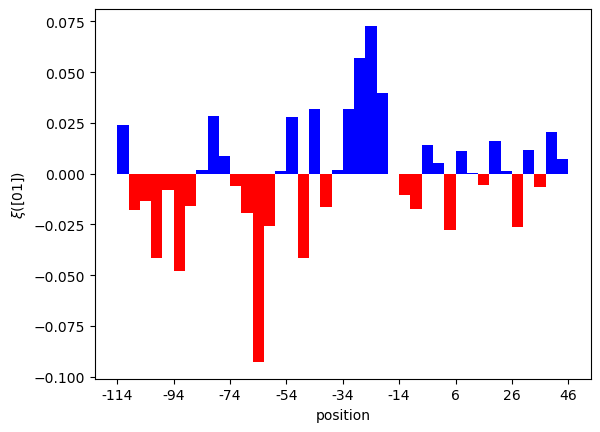

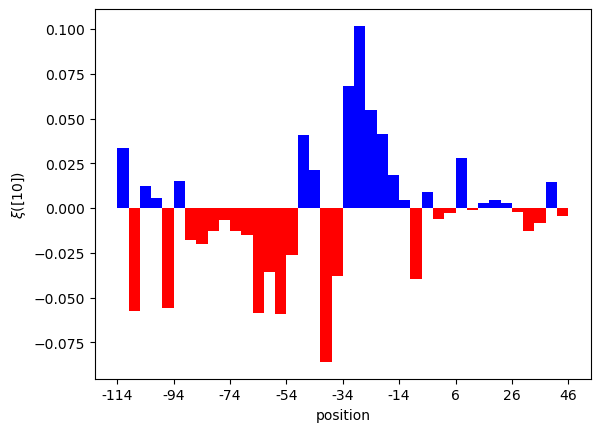

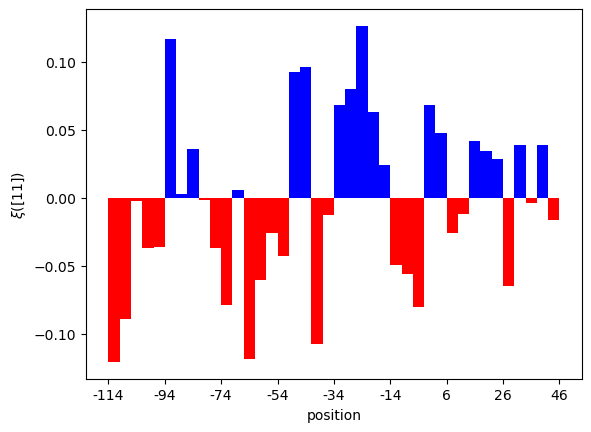

In [46]:
for i in range(1, len(xi)):

    vals_to_plot = xi[i]
    ax = plot_data(
        vals_to_plot, 
        bin_size=2, 
        segment_size=SEGMENT_SIZE, 
        seq_start=-114,
    )
    ax.set_ylabel(f"$\\xi({int_to_binary_arr(i, SEGMENT_SIZE)})$");
    plt.show()


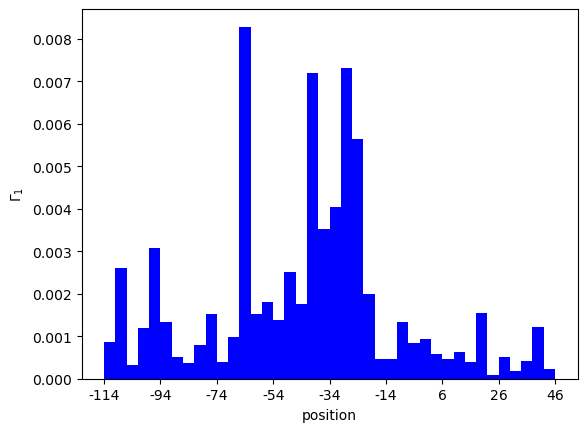

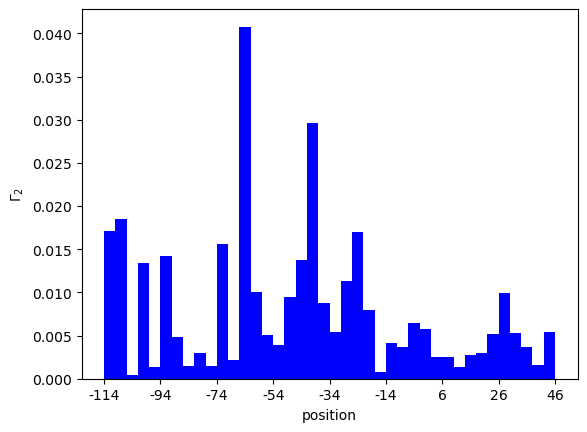

In [47]:
for i in range(1, len(gamma)):

    vals_to_plot = gamma[i]
    ax = plot_data(
        vals_to_plot, 
        bin_size=2, 
        segment_size=SEGMENT_SIZE, 
        seq_start=-114
    )
    ax.set_ylabel(f"$\\Gamma_{i}$");
    plt.show()
